# Tutorial: Complex Layers

In this tutorial, we study the impact of various layers wrt. magnitude and phase.

# References
1. Trabelsi et al. [Deep Complex Networks](https://openreview.net/pdf?id=H1T2hmZAb). In: Proceedings of ICLR, 2018.
2. Virtue et al. [Complex-valued Deep Learning with Applications to Magnetic Resonance Image Synthesis](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2019/EECS-2019-126.pdf), PhD thesis, 2019.
3. Daval-Frerot et al. [Exploring Complex-Valued Neural Networks with Trainable Activation Functions for Magnetic Resonance Imaging.](https://index.mirasmart.com/ISMRM2019/PDFfiles/0469.html). In: Proceedings of ISMRM, p. 0469, 2019.

As a first step, we provide a plotting function to display magnitude and phase.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
import merlintf
import optotf
import torch
import merlinth
import optoth
import random

torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

def plot(z, title):
    """ Plotting of magnitude and phase for the given complex image z. """
    z_magn = np.abs(z)
    z_phase = np.angle(z)
    zrep = zimp = np.linspace(-Ndim, Ndim, np.shape(z)[0])
    [zrep, zimp] = np.meshgrid(zrep, zimp)
    fig = plt.figure(figsize=(10,5))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')

    ax1.set_xlabel('Real')
    ax1.set_ylabel('Imag')
    surf = ax1.plot_surface(zrep, zimp, z_magn, cmap='viridis',
                           linewidth=0, antialiased=False)

    ax1.set_title(f'Magnitude: {title}')
    ax1.view_init(elev=10., azim=-135)
    
    ax2 = fig.add_subplot(1, 2, 2)

    ax2.set_xlabel('Real')
    ax2.set_ylabel('Imag')
    surf = ax2.imshow(z_phase, cmap='hsv', extent=[-Ndim, Ndim, Ndim, -Ndim], vmin=-np.pi, vmax=np.pi)
    ax2.set_title(f'Phase: {title}')
    ax2.invert_yaxis()
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(surf, cax=cax, ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    cbar.ax.set_yticklabels(['-pi', '-pi/2', '0', 'pi/2', 'pi'])
    
    plt.show()


Let us define and visualize an image on the complex plane using a meshgrid in the interval $[-1,1]$.

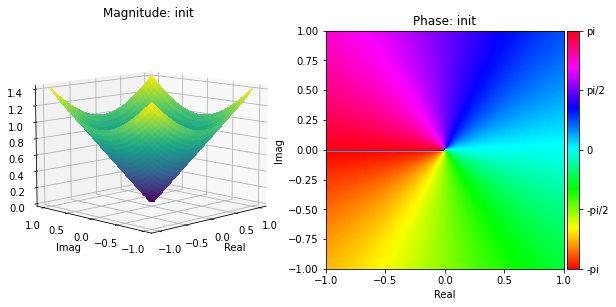

In [11]:
Ndim = 1
zre = zim = np.linspace(-Ndim, Ndim, 101)
[zre, zim] = np.meshgrid(zre, zim)

z = zre + 1j*zim

plot(z, 'init')

## Conversion and checks of complex tensors
Some functions are provided to work with complex tensors and to convert between complex tensors and numpy arrays.

### Tensorflow

In [4]:
# convert numpy to tensor
z_tensor = merlintf.numpy2tensor(z, add_batch_dim=True, add_channel_dim=True)

# get randomly normal distributed complex tensor
z_rand = merlintf.random_normal_complex(z_tensor.shape)

# check if complex-valued
print(merlintf.iscomplex(z_tensor))

# convert complex to real2ch
z_real2ch = merlintf.complex2real(z_tensor)

# convert complex to mag/pha 2 channel
z_magpha = merlintf.complex2magpha(z_tensor)

True


### Pytorch

In [5]:
# convert numpy to tensor
y_tensor = merlinth.numpy2tensor(z, add_batch_dim=True, add_channel_dim=True)

# get randomly normal distributed complex tensor
y_rand = merlinth.random_normal_complex(y_tensor.shape)

# check if complex-valued
print(merlinth.iscomplex(y_tensor))

# convert complex to real2ch
y_real2ch = merlinth.complex2real(y_tensor)

# convert complex to mag/pha 2 channel
y_magpha = merlinth.complex2magpha(y_tensor)

True


## Convolution
Extension of the real-valued convolution layer to the complex domain as either 2-channel real or fully complex is shown here. 

### Tensorflow/merlintf

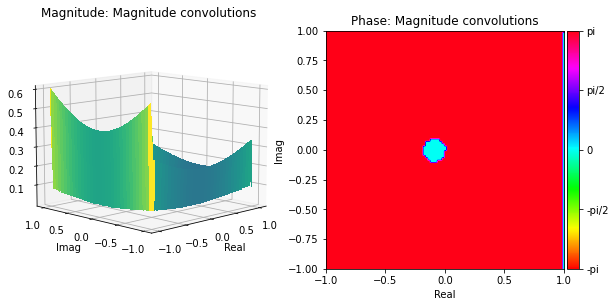

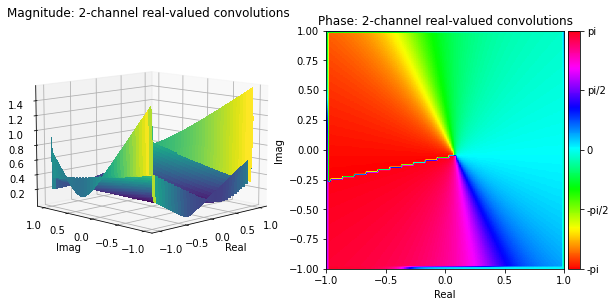

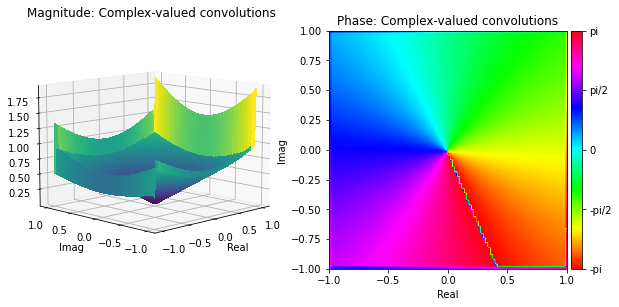

In [11]:
# conv layers
mag_conv = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='same')
real2ch_conv = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='same')
complex_conv = merlintf.keras.layers.ComplexConv2D(filters=1, kernel_size=3, padding='same')

# Tensor
z_tensor = merlintf.numpy2tensor(z, add_batch_dim=True, add_channel_dim=True)

# feature maps
real_mag_featuremap = mag_conv(merlintf.complex_abs(z_tensor))
real_2ch_featuremap = merlintf.real2complex(real2ch_conv(merlintf.complex2real(z_tensor)))
complex_featuremap = complex_conv(z_tensor)

# plot results
plot(np.squeeze(merlintf.tensor2numpy(real_mag_featuremap)), 'Magnitude convolutions')
plot(np.squeeze(merlintf.tensor2numpy(real_2ch_featuremap)), '2-channel real-valued convolutions')
plot(np.squeeze(merlintf.tensor2numpy(complex_featuremap)), 'Complex-valued convolutions')

### Torch/merlinth

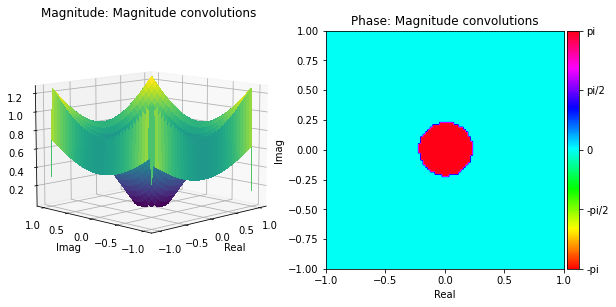

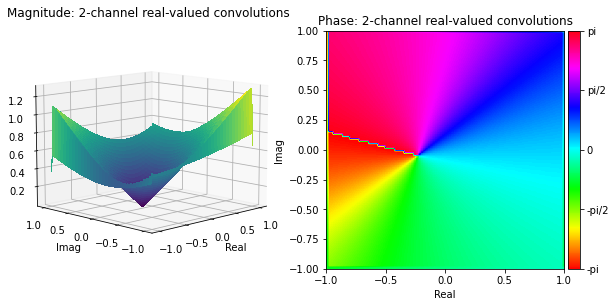

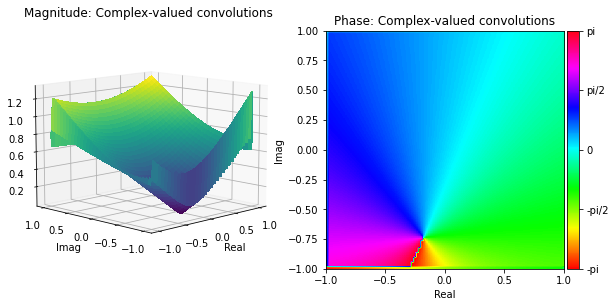

In [10]:
# conv layers
mag_conv = torch.nn.Conv2d(1, 1, (3,3), padding='same')
real2ch_conv = torch.nn.Conv2d(2, 2, (3,3), padding='same')
complex_conv = merlinth.layers.ComplexConv2d(1, 1, (3,3), padding='same')

# Tensor
z_tensor = merlinth.numpy2tensor(z, add_batch_dim=True, add_channel_dim=True).cuda()

# feature maps
real_mag_featuremap = mag_conv(merlinth.complex_abs(z_tensor))
real_2ch_featuremap = merlinth.real2complex(real2ch_conv(merlinth.complex2real(z_tensor)))
complex_featuremap = complex_conv(z_tensor)

# plot results
plot(np.squeeze(merlinth.tensor2numpy(real_mag_featuremap)), 'Magnitude convolutions')
plot(np.squeeze(merlinth.tensor2numpy(real_2ch_featuremap)), '2-channel real-valued convolutions')
plot(np.squeeze(merlinth.tensor2numpy(complex_featuremap)), 'Complex-valued convolutions')

## Pooling

Extension of the real-valued pooling layer to the complex domain as either 2-channel real or fully complex is shown here. 

### Tensorflow/merlintf

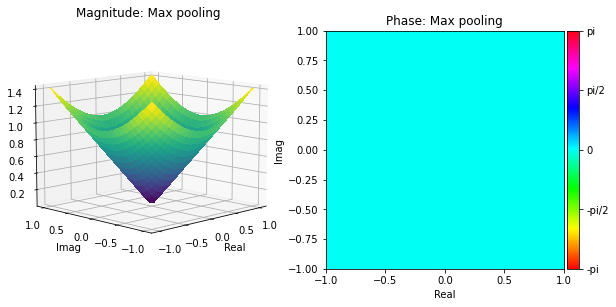

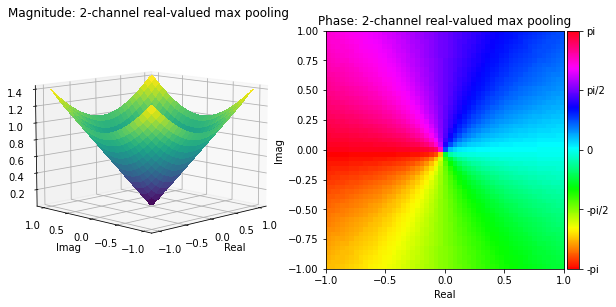

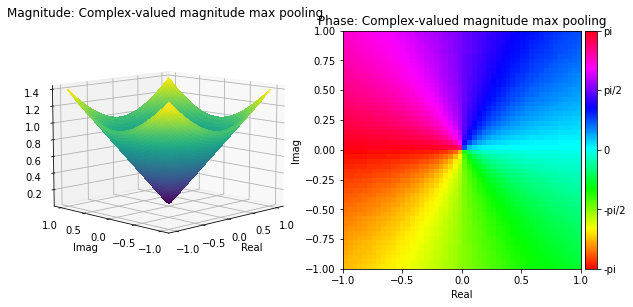

In [12]:
# pooling layers
mag_pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same')
real2ch_pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same')
complex_pool = merlintf.keras.layers.MagnitudeMaxPool2D(pool_size=(2,2), padding='same')

# Tensor
z_tensor = merlintf.numpy2tensor(z, add_batch_dim=True, add_channel_dim=True)

# pooled tensors
real_mag_pooled = mag_pool(merlintf.complex_abs(z_tensor))
real_2ch_pooled = merlintf.real2complex(real2ch_pool(merlintf.complex2real(z_tensor)))
complex_pooled = complex_pool(z_tensor)

# plot results
plot(np.squeeze(merlintf.tensor2numpy(real_mag_pooled)), 'Max pooling')
plot(np.squeeze(merlintf.tensor2numpy(real_2ch_pooled)), '2-channel real-valued max pooling')
plot(np.squeeze(merlintf.tensor2numpy(complex_pooled)), 'Complex-valued magnitude max pooling')


### Torch/merlinth

In [ ]:
# pooling layers
mag_pool = torch.nn.MaxPool2d((2,2))
real2ch_pool = torch.nn.MaxPool2d((2,2))
complex_pool = merlinth.layers.MagnitudeMaxPool2D((2,2))

# Tensor
z_tensor = merlinth.numpy2tensor(z, add_batch_dim=True, add_channel_dim=True).cuda()

# pooled tensors
real_mag_pooled = mag_pool(merlinth.complex_abs(z_tensor))
real_2ch_pooled = merlinth.real2complex(real2ch_pool(merlinth.complex2real(z_tensor)))
complex_pooled = complex_pool(z_tensor)

# plot results
plot(np.squeeze(merlinth.tensor2numpy(real_mag_pooled)), 'Max pooling')
plot(np.squeeze(merlinth.tensor2numpy(real_2ch_pooled)), '2-channel real-valued max pooling')
plot(np.squeeze(merlinth.tensor2numpy(complex_pooled)), 'Complex-valued magnitude max pooling')